# 시가총액 데이터셋(marcap) 튜토리얼 - 수정가격

<img src="https://i.imgur.com/b9t5FAA.png?1" width="60%">

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

In [32]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

fatal: destination path 'marcap' already exists and is not an empty directory.


In [33]:
from marcap import marcap_data

df_marcap = marcap_data('1995-05-02', '2021-01-15')
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,267810,앙츠,KONEX,일반기업부,1550,2,-250,-13.89,1550,1600,1550,1504,2331610,2397850000,1547000,KNX,2525
2021-01-15,225850,미애부,KONEX,일반기업부,670,3,0,0.00,670,670,670,50,33500,2232663110,3332333,KNX,2526
2021-01-15,224020,에스케이씨에스,KONEX,일반기업부,650,1,70,12.07,650,650,650,1,650,1998750000,3075000,KNX,2528


In [34]:
len(df_marcap)

11099879

## 수정주가(Adjust Price)

수정주가(Adjust Price)란 총 발행 주식수의 변화를 반영한 가격을 말합니다. 액면분할, 액면병합, 유상증자, 무상증자와 같이 총 발행주식수의 변화가 발생하면 가격의 변화가 생깁니다. 예를 들어, 어떤 회사가 액면분할을 통해 1주를 2개로 쪼갠다고 하면, 주식수를 2배로 늘어나고 주식의 가격은 1/2로 낮아지며 시가총액은 동일하게 유지 됩니다.

실제 예를 들어보죠.

2018년 5월 4일, 삼성전자는 50:1로 액면분할을 합니다. 1주가 50주로 쪼개지는 것이죠. 이때 5000원인 삼성전자 주식 액면가는 액면분할 후 100원이 되었습니다. 액면분할 전에 주당 265만원(4월30일 기준)에서 5만3천원이 되었습니다.

이 가격 데이터를 그대로 사용한다면 주가가 하루만에 1/50로 다시말해 -98% 하락한 것이 됩니다.

In [35]:
from marcap import marcap_data

code = '005930' # 삼성전자(005930)
df_stock = marcap_data('1995-05-02', '2021-01-15', code)

In [36]:
df_stock['2018-04-25':'2018-05-09']

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2018-04-25,005930,삼성전자,KOSPI,NaN,2520000,2,-3000,-0.12,2461000,2525000,2461000,332292,826565905260,323533964880000,128386494,STK,1
2018-04-26,005930,삼성전자,KOSPI,NaN,2607000,1,87000,3.45,2521000,2608000,2520000,360931,931526175000,334703589858000,128386494,STK,1
2018-04-27,005930,삼성전자,KOSPI,NaN,2650000,1,43000,1.65,2669000,2682000,2622000,606216,1611240055340,340224209100000,128386494,STK,1
2018-05-04,005930,삼성전자,KOSPI,NaN,51900,2,-1100,-2.08,53000,53900,51800,39565391,2078017927600,333162951930000,6419324700,STK,1
2018-05-08,005930,삼성전자,KOSPI,NaN,52600,1,700,1.35,52600,53200,51900,23104720,1218273031700,337656479220000,6419324700,STK,1
2018-05-09,005930,삼성전자,KOSPI,NaN,50900,2,-1700,-3.23,52600,52800,50900,16128305,831371915380,326743627230000,6419324700,STK,1


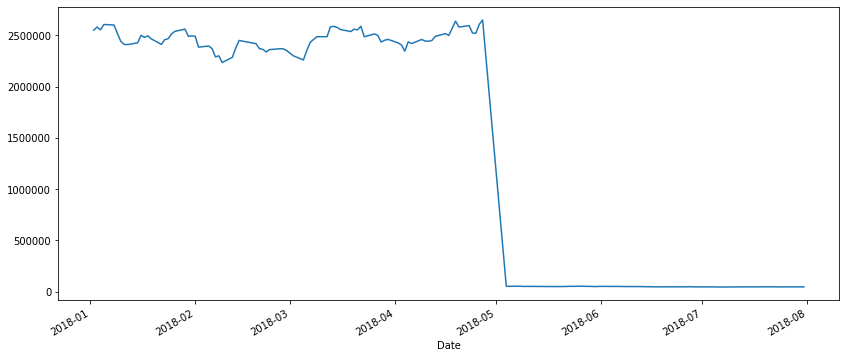

In [37]:
df_stock['2018-01':'2018-07']['Close'].plot(figsize=((14,6)))

백테스트를 하기 위해서는 주식 가격 데이터의 연속성이 보장되어야 합니다. 삼성전자가 5월 4일에 -98% 하락한 것으로 계산하면 안되겠죠. 

발행 주식수가 변화하는 이벤트가 있는 경우 반드시 주식수를 변화를 함께 고려해야 합니다. 발행주식수의 변화를 반영한 가격을 수정주가(Adjusted Closing Price)라고 합니다. 백테스트를 위해서는 꼭 수정주가를 사용해야 합니다.

In [38]:
df_stock['2018-04-25':'2018-05-09']

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2018-04-25,005930,삼성전자,KOSPI,NaN,2520000,2,-3000,-0.12,2461000,2525000,2461000,332292,826565905260,323533964880000,128386494,STK,1
2018-04-26,005930,삼성전자,KOSPI,NaN,2607000,1,87000,3.45,2521000,2608000,2520000,360931,931526175000,334703589858000,128386494,STK,1
2018-04-27,005930,삼성전자,KOSPI,NaN,2650000,1,43000,1.65,2669000,2682000,2622000,606216,1611240055340,340224209100000,128386494,STK,1
2018-05-04,005930,삼성전자,KOSPI,NaN,51900,2,-1100,-2.08,53000,53900,51800,39565391,2078017927600,333162951930000,6419324700,STK,1
2018-05-08,005930,삼성전자,KOSPI,NaN,52600,1,700,1.35,52600,53200,51900,23104720,1218273031700,337656479220000,6419324700,STK,1
2018-05-09,005930,삼성전자,KOSPI,NaN,50900,2,-1700,-3.23,52600,52800,50900,16128305,831371915380,326743627230000,6419324700,STK,1


액면분할을 위해 2018-04-30 부터 2018-05-03 까지 3일간 거래정지되고 2018-05-04 부터 액면분할된 가격으로 거래가 시작된 것을 확인할 수 있습니다. 2018-05-03일 총 주식수 128,386,494주에서 다음날 총 주식수는 6,419,324,700주 로 50배가 늘어났습니다. 즉 50:1로 액면분할을 한 것이죠.

수정가격은 보통 오늘 가격과 총 주식수를 과거 데이터에 반영하여 구합니다. 혹은 특정 테스트 범위의 가장 마지막 날의 가격과 총 주식수를 기준으로 과거 가격들을 수정합니다.

주가는 보통 종가(Close)를 기준으로 하기 때문에 수정주가로 가장 많이 쓰이는 것이 바로 수정 종가(Adjust Close Price) 입니다.

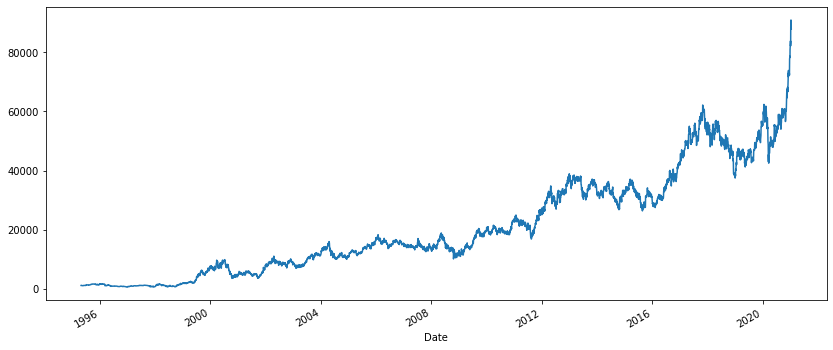

In [39]:
# 삼성전자(005930), 수정종가
latest_stocks = df_stock.iloc[-1]['Stocks'] # 범위 마지막날 주식수(기준)

df_stock['Adj Close'] = df_stock['Close'] * (df_stock['Stocks'] / latest_stocks) # 수정종가
df_stock['Adj Close'].plot(figsize=(14,6))

다음과 같이 2018년 `종가`와 `수정 종가`를 같이 그려놓고 보면 더 확실하게 차이를 알 수 있습니다.

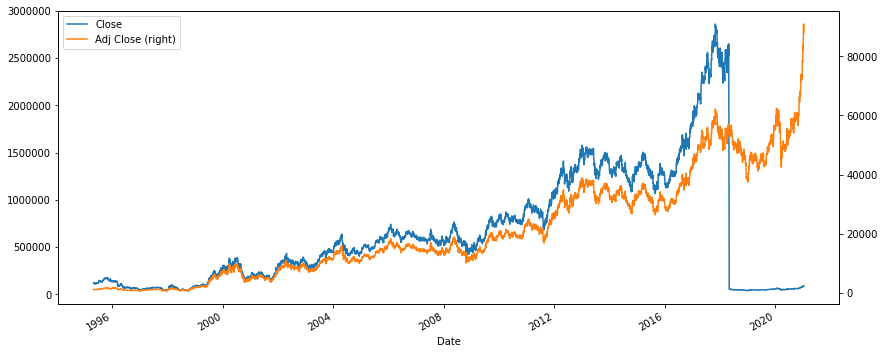

In [40]:
df_stock[['Close', 'Adj Close']].plot(secondary_y=['Adj Close'],figsize=(14,6))

대부분 종가(Close)를 기준으로 삼기 때문에 보통 수정종가(Adj Close)를 주로 사용합니다. 

하지만, 종가(Close)뿐만 아니라 시가(Open),고가(High),저가(Low)의 경우도 마찬가지로 백테스트에 사용한다면 
동일하게 수정가격을 적용하여 사용해야 합니다.



# 요약
특정 기간동안의 수익률을 정확하게 산정하기 위해서는 `수정 종가`로 계산해야 주식 가격의 연속성을 보장받을 수 있습니다.

시가총액(marcap) 데이터셋 뿐만 아니라 25년간 개별 종목의 가격 등 다양한 데이터를 포함하고 있습니다. 뿐만 아니라 발행 주식수가 데이터에 포함되어 있으므로 수정주가(Adjust Price)을 산출할 수 있습니다.

#### 2018 - 2021 [FinanceData.KR]()